In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
# import statsmodels.formula.api as smf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1

A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

### 1.1 What is the probability that a randomly chosen player would suffer an injury?

In [2]:
total_players = 235          # Total number of players
injured_players = 145        # Number of injured players
prob_injury = injured_players/total_players
print(f'The probability that a randomly chosen player would suffer an injury is {prob_injury:.3f}')

The probability that a randomly chosen player would suffer an injury is 0.617


- There's a 61.7\% chance that a randomly chosen player would suffer an injury

### 1.2 What is the probability that a player is a forward or a winger?

In [4]:
forward_players = 94         # Number of forward position players
winger_players = 29          # Number of winger position players
total_players = 235          # Total number of players = 235
prob_forward_OR_winger = (forward_players + winger_players)/total_players
print(f'The probability that a player is a forward or a winger is {prob_forward_OR_winger:.3f}')

The probability that a player is a forward or a winger is 0.523


- The chance of a player being a forward or a winger is 52.3\%

### 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [5]:
injured_striker = 45         # Number of injured striker players
total_players = 235          # Total number of players
prob_injured_striker = injured_striker/total_players
print(f'The probability that a randomly chosen player plays in a striker position and has a foot injury is {prob_injured_striker:.3f}')

The probability that a randomly chosen player plays in a striker position and has a foot injury is 0.191


- There's a 19\% chance that a randomly chosen player in a striker position has foot injury

### 1.4 What is the probability that a randomly chosen injured player is a striker?

In [6]:
injured_striker = 45               # Number of injured striker players
total_injured_players = 145        # Number of injured players
prob_injured_striker = injured_striker/total_injured_players
print(f'The probability that a randomly chosen injured player is a striker is {prob_injured_striker:.3f}')

The probability that a randomly chosen injured player is a striker is 0.310


- The chance of a randomly chosen injured player being a striker is 31\%

# Problem 2

The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain

In [ ]:
from scipy.stats import norm

mu = 5          # population mean
sigma = 1.5     # population standard deviation

x = np.linspace( mu - 3 * sigma, mu + 3 * sigma, 100)

### 2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

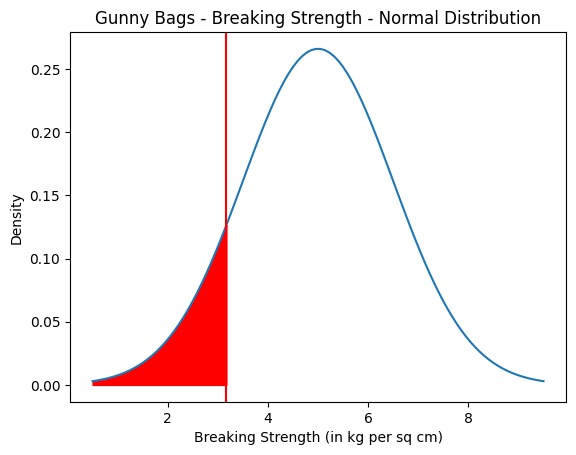

In [ ]:
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))
plt.axvline(x=3.17, color='red')
x1 = np.linspace(mu - 3 * sigma, 3.17, 100)
plt.fill_between(x1, norm.pdf(x1, loc=mu, scale=sigma), color='red')
plt.xlabel('Breaking Strength (in kg per sq cm)')
plt.ylabel('Density')
plt.title('Gunny Bags - Breaking Strength - Normal Distribution');

In [ ]:
prop_lessThan_317 = norm.cdf(3.17, loc=mu, scale=sigma)
print(f'The proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is {prop_lessThan_317:.2f}')

The proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is 0.11


- 11\% of the gunny bags have a breaking strength of less than 3.17 kg per sq cm

### 2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

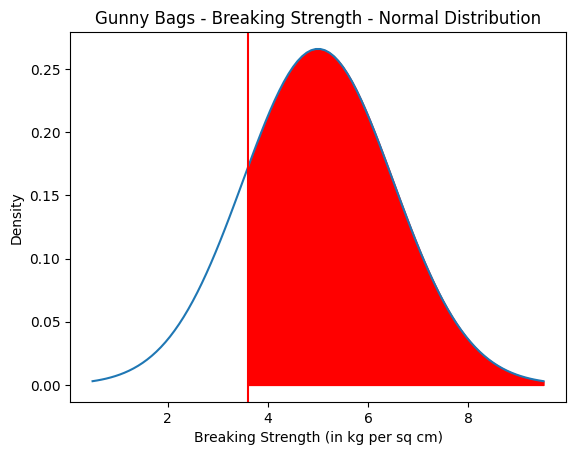

In [ ]:
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))
plt.axvline(x=3.6, color='red')
x1 = np.linspace(3.6, mu + 3 * sigma, 100)
plt.fill_between(x1, norm.pdf(x1, loc=mu, scale=sigma), color='red')
plt.xlabel('Breaking Strength (in kg per sq cm)')
plt.ylabel('Density')
plt.title('Gunny Bags - Breaking Strength - Normal Distribution');

In [ ]:
prop_atleast_36 = 1 - norm.cdf(3.6, loc=mu, scale=sigma)
print(f'The proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm is {prop_atleast_36:.2f}')

The proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm is 0.82


- 82\% of the gunny bags have a breaking strength of at least 3.6 kg per sq cm

### 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

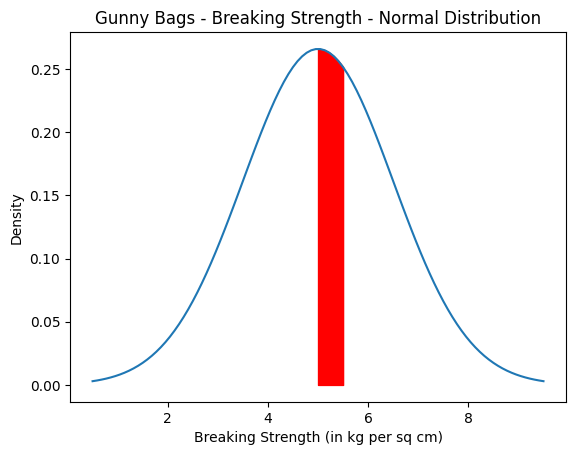

In [ ]:
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))
x1 = np.linspace(5, 5.5, 100)
plt.fill_between(x1, norm.pdf(x1, loc=mu, scale=sigma), color='red')
plt.xlabel('Breaking Strength (in kg per sq cm)')
plt.ylabel('Density')
plt.title('Gunny Bags - Breaking Strength - Normal Distribution');

In [ ]:
prob_btw_5_55 = norm.cdf(5.5, loc=mu, scale=sigma) - norm.cdf(5, loc=mu, scale=sigma)
print(f'The proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm is {prob_btw_5_55:.2f}')

The proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm is 0.13


- Only 13\% of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm

### 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

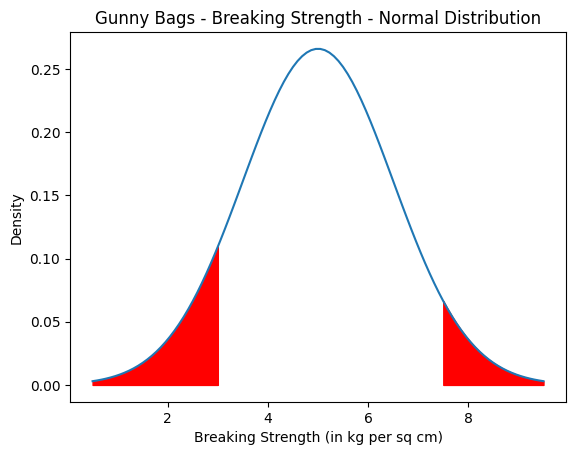

In [ ]:
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))
x1 = np.linspace(mu - 3 * sigma, 3, 100)
plt.fill_between(x1, norm.pdf(x1, loc=mu, scale=sigma), color='red')
x2 = np.linspace(7.5 , mu + 3 * sigma, 100)
plt.fill_between(x2, norm.pdf(x2, loc=mu, scale=sigma), color='red')
plt.xlabel('Breaking Strength (in kg per sq cm)')
plt.ylabel('Density')
plt.title('Gunny Bags - Breaking Strength - Normal Distribution');

In [ ]:
prob_notBtw_3_75 = norm.cdf(3, loc=mu, scale=sigma) + (1 - norm.cdf(7.5, loc=mu, scale=sigma))
print(f'The proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm is {prob_notBtw_3_75:.2f}')

The proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm is 0.14


- About 14\% of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm

# Problem 3

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients.Assume 5% significance level

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CsvFiles/Zingaro_Company.csv')

In [ ]:
df.columns

Index(['Unpolished ', 'Treated and Polished'], dtype='object')

- Renamin the column `'Unpolished '` to '`Unpolished'`

In [ ]:
df.rename(columns={'Unpolished ':'Unpolished'}, inplace=True)

In [ ]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [ ]:
n = df.shape[0]     # the sample size
alpha = 0.05        # significance level

In [ ]:
xbar_unpolished, s_unpolished = df['Unpolished'].mean(), df['Unpolished'].std()
print(f'The unpolished sample mean is {xbar_unpolished:.2f}')
print(f'The unpolished sample standard deviation is {s_unpolished:.2f}')
xbar_polished, s_polished = df['Treated and Polished'].mean(), df['Treated and Polished'].std()
print(f'The polished sample mean is {xbar_polished:.2f}')
print(f'The polished sample standard deviation is {s_polished:.2f}')

The unpolished sample mean is 134.11
The unpolished sample standard deviation is 33.04
The polished sample mean is 147.79
The polished sample standard deviation is 15.59


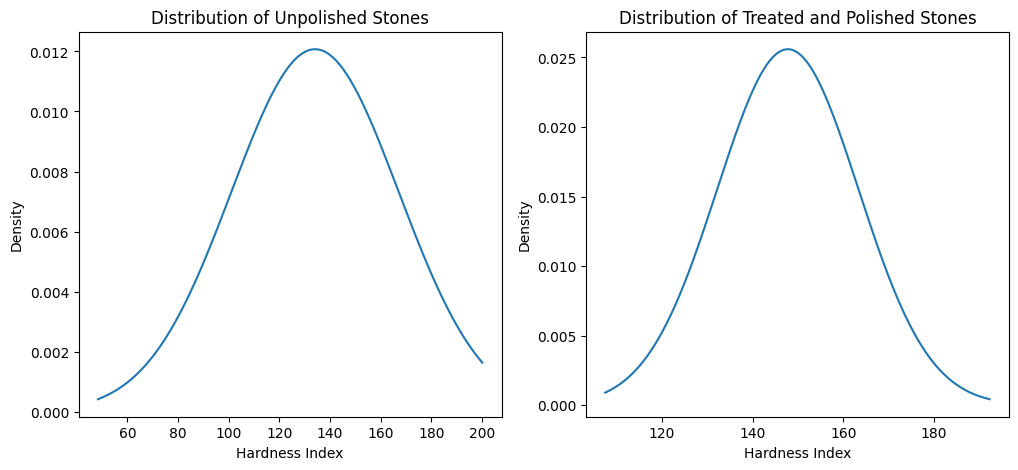

In [ ]:
from scipy.stats import norm
x = np.linspace(df['Unpolished'].min(), df['Unpolished'].max(), 500)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(x, norm.pdf(x, loc=xbar_unpolished, scale=s_unpolished))
ax[0].set_title("Distribution of Unpolished Stones")
ax[0].set_xlabel("Hardness Index")
ax[0].set_ylabel("Density")
x1 = np.linspace(df['Treated and Polished'].min(), df['Treated and Polished'].max(), 500)
ax[1].plot(x1, norm.pdf(x1, loc=xbar_polished, scale=s_polished))
ax[1].set_title("Distribution of Treated and Polished Stones")
ax[1].set_xlabel("Hardness Index")
ax[1].set_ylabel("Density");

### 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?


Let μ be the mean hardness index of unpolished stones

**Null Hypothesis** :
>  $H_0: \mu >= 150 $

**Alternate Hypothesis** :
>  $H_a: \mu < 150 $

**T-test Assumptions**

- Sample size > 30, the distribution of sample means approaches normal distribution as per the Central Limit Theorem(CLT)
- Randomly chosen data
- Unknown Population standard variation
- Continuous data - hardness index of the unpolished stones

In [ ]:
from scipy.stats import ttest_1samp


test_stat, p_value = ttest_1samp(df['Unpolished'], popmean=150, alternative='less')
print(f'The p-value is {p_value}')

if p_value <= alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 4.171286997419652e-05
Reject the null hypothesis


- The p-value is much less than the level of significance, we can reject the null hypothesis

- So, the mean hardness index of the unpolished stones < 150

- Thus, we have enough evidence from the T-test to claim that the unpolished stones are not suitable for printing


### 3.2 Is the mean hardness of the polished and unpolished stones the same?

Let μ1, μ2 denote the mean hardness of the polished and unpolished stones respectively

**Null Hypothesis** :    

> $H_0: \mu1 = \mu2 $

**Alternate Hypothesis** :

> $H_a: \mu1 ≠ \mu2 $

In [ ]:
print(f'The mean hardness index of the polished stones is : {round(df["Treated and Polished"].mean(), 2)}')
print(f'The mean hardness index of the unpolished stones is : {round(df["Unpolished"].mean(), 2)}')
print(f'The standard deviation of the polished stones is : {round(df["Treated and Polished"].std(), 2)}')
print(f'The standard deviation of the unpolished stones is : {round(df["Unpolished"].std(), 2)}')

The mean hardness index of the polished stones is : 147.79
The mean hardness index of the unpolished stones is : 134.11
The standard deviation of the polished stones is : 15.59
The standard deviation of the unpolished stones is : 33.04


**Assumptions of Two Independent Sample T-test for Equality of Means (Unequal Standard Variance)**

- Continuous data - the hardness index of the polished and unpolished stones

- Normal Distribution is assumed as sample size > 30, the distribution of sample means approaches the normal distribution irrespective of the population distribution

- Unequal Standard Variances

- Independent populations

- Random Sampling


In [ ]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(df['Treated and Polished'], df['Unpolished'], equal_var=False, alternative='two-sided')
print(f"The p-value is : {p_value}")


if p_value <= alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is : 0.001588379295584306
Reject the null hypothesis


- The p-value is much less than the level of significance, we can reject the null hypothesis

- Thus, we have enough evidence to claim that the the mean hardness index of the unpolished stones and polished stones are unequal


# Problem 4

Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/CsvFiles/DentalHardnessdata.xlsx', sheet_name='Data')
df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [ ]:
df['Dentist'].value_counts()

,count
Dentist,
1,18
2,18
3,18
4,18
5,18


**Note** : As both type of alloys can't be considered together, we can separate the dataset for the two types of alloys.

In [ ]:
# dataset for alloy 1
df_alloyA = df[df['Alloy'] == 1]
df_alloyA.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
6,1,2,1,1500,782
7,1,2,1,1600,698


In [ ]:
# list of all Dentists who use alloy 1
df_alloyA['Dentist'].value_counts()

,count
Dentist,
1,9
2,9
3,9
4,9
5,9


In [ ]:
# dataset for alloy 2
df_alloyB = df[df['Alloy'] == 2]
df_alloyB.head()

,Dentist,Method,Alloy,Temp,Response
3,1,1,2,1500,907
4,1,1,2,1600,792
5,1,1,2,1700,835
9,1,2,2,1500,1115
10,1,2,2,1600,835


In [ ]:
# list of all Dentists who use alloy 2
df_alloyB['Dentist'].value_counts()

,count
Dentist,
1,9
2,9
3,9
4,9
5,9


## 4.1 How does the hardness of implants vary depending on dentists?

### For Alloy 1

**Null Hypothesis** :

> Mean hardness of implants for Alloy 1 is equal across all dentists

**Alternate Hypothesis** :

> Atleast one of the doctors have different mean hardness for Alloy 1

**Assumptions of One Way ANOVA**

- Samples are independent random samples
- Population is normally distributed
- Population variances are equal

In [ ]:
# Assume level of significance
alpha = 0.05

**Shapiro-Wilk's Test**

For testing the normality assumption of ANOVA

> **Null Hypothesis** : Mean hardness for Alloy 1 follows a normal distribution

> **Alternate Hypothesis** : Mean hardness for Alloy 1 do not follow a normal distribution

In [ ]:
from scipy.stats import shapiro

test_stat, p_value = shapiro(df_alloyA['Response'])
print(f'The p-value is {p_value}')

The p-value is 1.1945308699072215e-05


- As p-value is less than significance level, we **Reject the Null Hypothesis**


**Levene's Test**

Fo testing equality of variance in ANOVA

**Null Hypothesis**

> All population variances are equal

**Alternate Hypothesis**

> Atleast one variance is different fron the rest

In [ ]:
from scipy.stats import levene

test_stat, p_value = levene(
    df_alloyA[df_alloyA['Dentist'] == 1]['Response'],
    df_alloyA[df_alloyA['Dentist'] == 2]['Response'],
    df_alloyA[df_alloyA['Dentist'] == 3]['Response'],
    df_alloyA[df_alloyA['Dentist'] == 4]['Response'],
    df_alloyA[df_alloyA['Dentist'] == 5]['Response']
)
print(f'The p-value is {p_value}')

The p-value is 0.2565537418543795


- As p-value isn't less than significance level, we **Fail to Reject Null Hypothesis**

- However, we proceed with the **One Way ANOVA Test**, even though the normality assumption fails !

In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(
    df_alloyA[df_alloyA['Dentist'] == 1]['Response'],
    df_alloyA[df_alloyA['Dentist'] == 2]['Response'],
    df_alloyA[df_alloyA['Dentist'] == 3]['Response'],
    df_alloyA[df_alloyA['Dentist'] == 4]['Response'],
    df_alloyA[df_alloyA['Dentist'] == 5]['Response']
)
print(f'The p-value is {p_value}')
if p_value <= alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 0.11656712140267628
Fail to reject the null hypothesis


**Conclusions**   


- All the 5 doctors have **same mean hardness** for Alloy 1

- **μ1 = μ2 = μ3 = μ4 = μ5** : where μ1, μ2, μ3, μ4, μ5 represent the mean hardness of the Alloy 1 implants for doctors numbered as 1, 2, 3, 4 and 5 respectively

### For Alloy 2

**Null Hypothesis** :

> Mean hardness of implants for Alloy 2 is equal across all dentists

**Alternate Hypothesis** :

> Atleast one of the doctors have different mean hardness for Alloy 2

**Assumptions of One Way ANOVA**

- Samples are independent random samples
- Population is normally distributed
- Population variances are equal

In [ ]:
# Assume level of significance
alpha = 0.05

**Shapiro-Wilk's Test**

For testing the normality assumption of ANOVA

> **Null Hypothesis** : Mean hardness for Alloy 2 follows a normal distribution

> **Alternate Hypothesis** : Mean hardness for Alloy 2 do not follow a normal distribution

In [ ]:
from scipy.stats import shapiro

test_stat, p_value = shapiro(df_alloyB['Response'])
print(f'The p-value is {p_value}')

The p-value is 0.00040293129942514585


- As p-value is less than significance level, we **Reject the Null Hypothesis**


**Levene's Test**

Fo testing equality of variance in ANOVA

**Null Hypothesis**

> All population variances are equal

**Alternate Hypothesis**

> Atleast one variance is different fron the rest

In [ ]:
from scipy.stats import levene

test_stat, p_value = levene(
    df_alloyB[df_alloyB['Dentist'] == 1]['Response'],
    df_alloyB[df_alloyB['Dentist'] == 2]['Response'],
    df_alloyB[df_alloyB['Dentist'] == 3]['Response'],
    df_alloyB[df_alloyB['Dentist'] == 4]['Response'],
    df_alloyB[df_alloyB['Dentist'] == 5]['Response']
)
print(f'The p-value is {p_value}')

The p-value is 0.23686777576324952


- As p-value isn't less than significance level, we **Fail to Reject Null Hypothesis**

- However, we proceed with the **One Way ANOVA Test**, even though the normality assumption fails !

In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(
    df_alloyB[df_alloyB['Dentist'] == 1]['Response'],
    df_alloyB[df_alloyB['Dentist'] == 2]['Response'],
    df_alloyB[df_alloyB['Dentist'] == 3]['Response'],
    df_alloyB[df_alloyB['Dentist'] == 4]['Response'],
    df_alloyB[df_alloyB['Dentist'] == 5]['Response']
)
print(f'The p-value is {p_value}')
if p_value <= alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 0.7180309510793431
Fail to reject the null hypothesis


**Conclusions**   


- All the 5 doctors have **same mean hardness** for Alloy 2

- **μ1 = μ2 = μ3 = μ4 = μ5** : where μ1, μ2, μ3, μ4, μ5 represent the mean hardness of the Alloy 2 implants for doctors numbered as 1, 2, 3, 4 and 5 respectively

## 4.2 How does the hardness of implants vary depending on methods?

In [ ]:
# Assume level of significance
alpha = 0.05

In [ ]:
df_alloyA['Method'].value_counts()

,count
Method,
1,15
2,15
3,15


### Alloy 1


**Null Hypothesis** :

> Mean hardness of implants for Alloy 1 is equal across all methods

**Alternate Hypothesis** :

> Atleast one of the methods have different mean hardness for Alloy 1

**Assumptions of One Way ANOVA**

- Samples are independent random samples
- Population is normally distributed
- Population variances are equal

**Shapiro-Wilk's Test**

For testing the normality assumption of ANOVA

> **Null Hypothesis** : Mean hardness for Alloy 1 follows a normal distribution

> **Alternate Hypothesis** : Mean hardness for Alloy 1 do not follow a normal distribution

In [ ]:
from scipy.stats import shapiro

test_stat, p_value = shapiro(df_alloyA['Response'])
print(f'The p-value is {p_value}')

The p-value is 1.1945308699072215e-05


**Levene's Test**

Fo testing equality of variance in ANOVA

**Null Hypothesis**

> All population variances are equal

**Alternate Hypothesis**

> Atleast one variance is different fron the rest

In [ ]:
from scipy.stats import levene

test_stat, p_value = levene(
    df_alloyA[df_alloyA['Method'] == 1]['Response'],
    df_alloyA[df_alloyA['Method'] == 2]['Response'],
    df_alloyA[df_alloyA['Method'] == 3]['Response']
)
print(f'The p-value is {p_value}')

The p-value is 0.0034160381460233966


In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(
    df_alloyA[df_alloyA['Method'] == 1]['Response'],
    df_alloyA[df_alloyA['Method'] == 2]['Response'],
    df_alloyA[df_alloyA['Method'] == 3]['Response']
)
print(f'The p-value is {p_value}')
if p_value <= alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 0.0041634121675055424
Reject the null hypothesis


- Thus, we have enough eveidence to claim that - **Atleast one of the methods have different mean hardness for Alloy 1**


**Multi Comparison(Pairwise Tukey HSD)**

- In order to identify for which method the mean hardness is different from other groups, the null hypothesis :

>  $𝐻_0:  𝜇_1 = 𝜇_2 \text{ or } 𝜇_1 = 𝜇_3 \text{ or } 𝜇_2 = 𝜇_3$

**alternative hypothesis** :   

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

Here μ1, μ2, μ3 represents the  mean hardness of methods 1, 2 and 3 respectively for Alloy 1

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog = df_alloyA['Response'], groups = df_alloyA['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


Thus, for Alloy 1 :

- mean hardness of Methods 1 and 2 are similar
- However, the mean hardness of **Method 3** differs from the hardness of the other methods

### Alloy 2


**Null Hypothesis** :

> Mean hardness of implants for Alloy 2 is equal across all methods

**Alternate Hypothesis** :

> Atleast one of the methods have different mean hardness for Alloy 2

**Assumptions of One Way ANOVA**

- Samples are independent random samples
- Population is normally distributed
- Population variances are equal

**Shapiro-Wilk's Test**

For testing the normality assumption of ANOVA

> **Null Hypothesis** : Mean hardness for Alloy 2 follows a normal distribution

> **Alternate Hypothesis** : Mean hardness for Alloy 2 do not follow a normal distribution

In [ ]:
from scipy.stats import shapiro

test_stat, p_value = shapiro(df_alloyB['Response'])
print(f'The p-value is {p_value}')

The p-value is 0.00040293129942514585


**Levene's Test**

Fo testing equality of variance in ANOVA

**Null Hypothesis**

> All population variances are equal

**Alternate Hypothesis**

> Atleast one variance is different fron the rest

In [ ]:
from scipy.stats import levene

test_stat, p_value = levene(
    df_alloyB[df_alloyB['Method'] == 1]['Response'],
    df_alloyB[df_alloyB['Method'] == 2]['Response'],
    df_alloyB[df_alloyB['Method'] == 3]['Response']
)
print(f'The p-value is {p_value}')

The p-value is 0.044692699391586675


In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(
    df_alloyB[df_alloyB['Method'] == 1]['Response'],
    df_alloyB[df_alloyB['Method'] == 2]['Response'],
    df_alloyB[df_alloyB['Method'] == 3]['Response']
)
print(f'The p-value is {p_value}')
if p_value <= alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 5.4158710514431865e-06
Reject the null hypothesis


- Thus, we have enough eveidence to claim that - **Atleast one of the methods have different mean hardness for Alloy 2**


**Multi Comparison(Pairwise Tukey HSD)**

- In order to identify for which method the mean hardness is different from other groups, the null hypothesis :

>  $𝐻_0:  𝜇_1 = 𝜇_2 \text{ or } 𝜇_1 = 𝜇_3 \text{ or } 𝜇_2 = 𝜇_3$

**alternative hypothesis** :   

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

Here μ1, μ2, μ3 represents the  mean hardness of methods 1, 2 and 3 respectively for Alloy 2

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog = df_alloyB['Response'], groups = df_alloyB['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


Thus, for Alloy 2 :

- mean hardness of Methods 1 and 2 are similar
- However, the mean hardness of **Method 3** differs from the hardness of the other methods

## 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

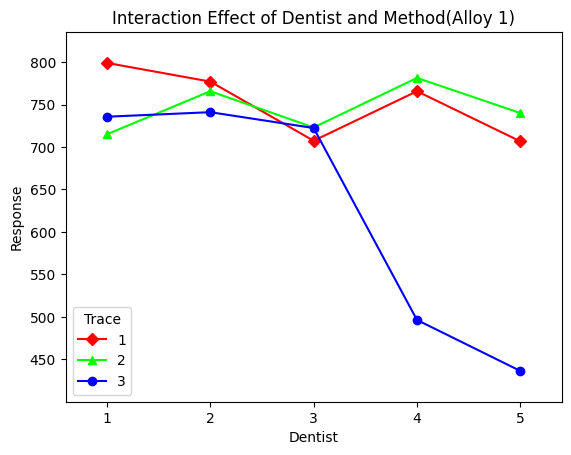

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(df_alloyA['Dentist']),np.array(df_alloyA['Method']),np.array(df_alloyA['Response']),markers=['D','^','o'])
plt.xlabel('Dentist')
plt.ylabel('Response')
plt.title('Interaction Effect of Dentist and Method(Alloy 1)');

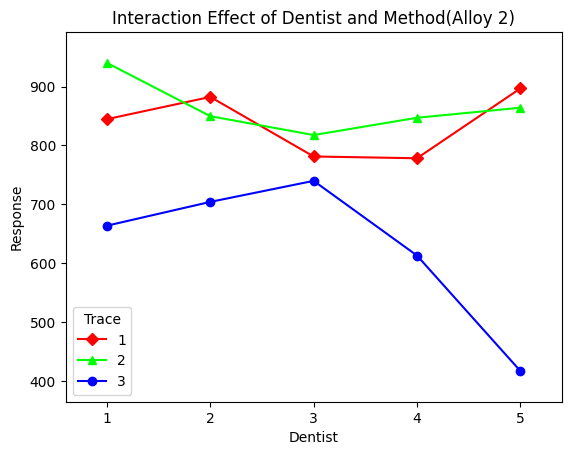

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(df_alloyB['Dentist']),np.array(df_alloyB['Method']),np.array(df_alloyB['Response']),markers=['D','^','o'])
plt.xlabel('Dentist')
plt.ylabel('Response')
plt.title('Interaction Effect of Dentist and Method(Alloy 2)');

**Conclusion**

**For Alloy 1** :

- There is some interaction effect between Dentists and Method used for Alloy 1 as the plot shows crossing lines

**For Alloy 2** :

- Method 3 yields lower hardness of implants for all Dentists
- Methods 1 and 2 show some interaction effect between Dentists and Method


## 4.4 How does the hardness of implants vary depending on dentists and methods together?

### For Alloy 1

**Null Hypothesis** :

> 𝐻ₒ : There is no interaction effect between Dentists and Method used on the mean hardness of the implants.ie, the effect of Dentists on the mean hardness of the implants does not depend on the effect of the Method variable for Alloy 1

**Alternate Hypothesis** :

> 𝐻ₐ : There is an interaction effect between Dentists and Method used on the mean hardness of the implants for Alloy 1

**Assumptions for the two-way ANOVA Test**  :  As the two-way ANOVA is a type of linear model we need to satisfy pretty much the same assumptions as we did for  a one-way ANOVA

**Refered source** : [Article](https://cambiotraining.github.io/corestats/materials/cs4_practical_two-way-anova.html)

**Shapiro-Wilk's Test**

For testing the normality assumption of ANOVA

> **Null Hypothesis** : Mean hardness for Alloy 1 follows a normal distribution

> **Alternate Hypothesis** : Mean hardness for Alloy 1 do not follow a normal distribution

In [ ]:
model = ols(formula = "Response ~ Dentist * Method", data = df_alloyA)
alloyA_normality_model = model.fit()

In [ ]:
from scipy.stats import shapiro
test_stat, p_val = shapiro(alloyA_normality_model.resid)
print(f'The p-value is {p_val}')
if p_val < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 0.47449485575334277
Fail to reject the null hypothesis


- Normal distribution of mean hardness of Alloy 1

**Levene's Test**

For testing equality of variance in ANOVA

**Null Hypothesis**

> All population variances are equal

**Alternate Hypothesis**

> Atleast one variance is different fron the rest

In [ ]:
from scipy.stats import levene

data = []
for i in df_alloyA['Dentist'].unique():
    for j in df_alloyA['Method'].unique():
        data.append(df_alloyA[(df_alloyA['Dentist'] == i) & (df_alloyA['Method'] == j)]['Response'])


test_stat, p_value = levene(*data)
print(f'The p-value is {p_value}')
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 0.3128166652989495
Fail to reject the null hypothesis


- All population variances are equal

In [ ]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, df_alloyA).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,106683.688889,26670.922222,3.899638,0.011484
C(Method),2.0,148472.177778,74236.088889,10.854287,0.000284
C(Dentist):C(Method),8.0,185941.377778,23242.672222,3.398383,0.006793
Residual,30.0,205180.000000,6839.333333,NaN,NaN


In [ ]:
row_name = 'C(Dentist):C(Method)'
p_value_interaction = aov_table.loc[row_name, 'PR(>F)']

# print the conclusion based on p-value
if p_value_interaction < 0.05:
    print(f'As the p-value {p_value_interaction} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_interaction} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.006792747204237399 is less than the level of significance, we reject the null hypothesis.


**Conclusion** :

- There is an interaction effect between Dentists and Method used on the mean hardness of the implants for Alloy 1

### For Alloy 2

**Null Hypothesis** :

> 𝐻ₒ : There is no interaction effect between Dentists and Method used on the mean hardness of the implants.ie, the effect of Dentists on the mean hardness of the implants does not depend on the effect of the Method variable for Alloy 2

**Alternate Hypothesis** :

> 𝐻ₐ : There is an interaction effect between Dentists and Method used on the mean hardness of the implants for Alloy 2

**Shapiro-Wilk's Test**

For testing the normality assumption of ANOVA

> **Null Hypothesis** : Mean hardness for Alloy 2 follows a normal distribution

> **Alternate Hypothesis** : Mean hardness for Alloy 2 do not follow a normal distribution

In [ ]:
model = ols(formula = "Response ~ Dentist * Method", data = df_alloyB)
alloyB_normality_model = model.fit()

In [ ]:
from scipy.stats import shapiro
test_stat, p_val = shapiro(alloyB_normality_model.resid)
print(f'The p-value is {p_val}')
if p_val < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 0.48564644802909257
Fail to reject the null hypothesis


- Normal Distribution of mean hardness for Alloy 2

**Levene's Test**

Fo testing equality of variance in ANOVA

**Null Hypothesis**

> All population variances are equal

**Alternate Hypothesis**

> Atleast one variance is different fron the rest

In [ ]:
from scipy.stats import levene

data = []
for i in df_alloyA['Dentist'].unique():
    for j in df_alloyA['Method'].unique():
        data.append(df_alloyB[(df_alloyB['Dentist'] == i) & (df_alloyB['Method'] == j)]['Response'])


test_stat, p_value = levene(*data)
print(f'The p-value is {p_value}')
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 0.7831735515657826
Fail to reject the null hypothesis


- All population variances are equal

In [ ]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, df_alloyB).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,56797.911111,14199.477778,1.106152,0.371833
C(Method),2.0,499640.400000,249820.200000,19.461218,0.000004
C(Dentist):C(Method),8.0,197459.822222,24682.477778,1.922787,0.093234
Residual,30.0,385104.666667,12836.822222,NaN,NaN


In [ ]:
row_name = 'C(Dentist):C(Method)'
p_value_interaction = aov_table.loc[row_name, 'PR(>F)']

# print the conclusion based on p-value
if p_value_interaction < 0.05:
    print(f'As the p-value {p_value_interaction} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_interaction} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.09323403966149718 is greater than the level of significance, we fail to reject the null hypothesis.


**Conclusion** :

- No interaction effect between Dentists and Method used on the mean hardness of the implants for Alloy 2